In [1]:
using Plots
using Printf

In [2]:
folder_path = "graficos/"

if !isdir(folder_path)
    mkdir(folder_path)
end
;

subfolder_name = "simulacao_do_MEF"

full_path = joinpath(folder_path, subfolder_name)

if !isdir(full_path)
    mkdir(full_path)
end

subfolder_name = "Q1"

full_path = joinpath(full_path, subfolder_name)

if !isdir(full_path)
    mkdir(full_path)
end
;

In [3]:
# Define os pesos para os pontos de integração (argumentos: nint -> número de pontos de integração)

function we(nint)
    w = zeros(nint)
    if(nint == 2)
        w[1] = 1.0
        w[2] = 1.0
    elseif(nint == 3)
        w[1] = 5/9
        w[2] = 8/9
        w[3] = 5/9
    elseif(nint == 4)
        w[1] = (18-sqrt(30.))/36;
        w[2] = (18+sqrt(30.))/36;
        w[3] = (18+sqrt(30.))/36;
        w[4] = (18-sqrt(30.))/36;
    elseif(nint == 5)
        w[1] = (322-13*sqrt(70))/900;
        w[2] = (322+13*sqrt(70))/900;
        w[3] =  128/225;
        w[4] = (322+13*sqrt(70))/900;
        w[5] = (322-13*sqrt(70))/900;
    end
    return w
end
;

# Define os pontos de integração (argumentos: nint -> número de pontos de integração)
function pe(nint)
    pt = zeros(nint)
    if(nint == 2)
        pt[1] = -sqrt(3.)/3.;
        pt[2] = sqrt(3.)/3.;
    elseif(nint == 3)
        pt[1] = sqrt(3/5);
        pt[2] = 0;
        pt[3] = -sqrt(3/5);
    elseif(nint == 4)
        pt[1] = sqrt((3+2*sqrt(6/5))/7);
        pt[2] = sqrt((3-2*sqrt(6/5))/7);
        pt[3] = -sqrt((3-2*sqrt(6/5))/7);
        pt[4] = -sqrt((3+2*sqrt(6/5))/7);
    elseif(nint == 5)
        pt[1] = -(1/3)*sqrt((5+2*sqrt(10/7)));
        pt[2] = -(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[3] =   0;
        pt[4] = +(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[5] = +(1/3)*sqrt((5+2*sqrt(10/7)));
    end
    
    return pt
end
;

In [4]:
# Função que define os polinômios de integração (argumentos: typ -> se é o polinômio [1] ou a derivada do polinômio [0]; nen -> número de nós do elemento; nint -> número de pontos de integração)

function shl(typ, nen, nint)
    
    pt = pe(nint)
    w = we(nint)
    
    if(typ == 1)
        sh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                sh[1,l] = (1.0-t)/2.0;
                sh[2,l] = (1.0+t)/2.0;
            elseif(nen==3)
                sh[1,l] = t*(t-1.0)/2.0;
                sh[2,l] = -(t-1)*(t+1);
                sh[3,l] = t*(t+1.0)/2.0;
            elseif(nen==4)
                sh[1,l] = -( 9/16)*(t+(1/3))*(t-(1/3))*(t-1);
                sh[2,l] =  (27/16)*(t+1)    *(t-(1/3))*(t-1);
                sh[3,l] = -(27/16)*(t+1)    *(t+(1/3))*(t-1);
                sh[4,l] =  ( 9/16)*(t+1)    *(t+(1/3))*(t-(1/3));
            elseif(nen==5)
                sh[1,l] =  (2/3)*(t+(1/2))*t*(t-(1/2))*(t-1);
                sh[2,l] = -(8/3)*(t+1)*t*(t-(1/2))*(t-1);
                sh[3,l] =      4*(t+1)*(t+(1/2))*(t-(1/2))*(t-1);
                sh[4,l] = -(8/3)*(t+1)*(t+(1/2))*t*(t-1);
                sh[5,l] =  (2/3)*(t+1)*(t+(1/2))*t*(t-(1/2)); 
            end
        end
        return sh
    elseif(typ == 2)
        dsh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                dsh[1,l] = (-1.0)/2.0;
                dsh[2,l] = (1.0)/2.0;
            elseif(nen==3)
                dsh[1,l] = (2*t + 1)/2.0;
                dsh[2,l] = -2*t;
                dsh[3,l] = (2*t - 1)/2.0;
            elseif(nen==4)
                dsh[1,l] = -(27*t*t - 18*t - 1)/16;
                dsh[2,l] = 9*(9*t*t - 2*t - 3)/16;
                dsh[3,l] = -9*(9*t*t + 2*t - 3)/16;
                dsh[4,l] = +(27*t*t + 18*t - 1)/16;
            elseif(nen==5)
                dsh[1,l] = (16*(t^3) - 12*(t^2) - 2*t + 1)/6;
                dsh[2,l] = -4*(8*(t^3) - 3*(t^2) - 4*t + 1)/3;
                dsh[3,l] = (16*(t^3) - 10*t)
                dsh[4,l] = -4*(8*(t^3) + 3*(t^2) - 4*t - 1)/3;
                dsh[5,l] = (16*(t^3) + 12*(t^2) - 2*t - 1)/6;
            end
        end
        return dsh
    end
end
;

In [5]:
# Define os intervalos reais do elemento

a = 0
b = +1.0
;

In [6]:
function shl_bubble(typ, nen, nint, beta)
    pt = pe(nint)
    w = we(nint)
    if(typ == 1)
        sh = zeros(nen, nint)
        for l=1:nint
            t=pt[l]
            sh[1,l] = (1-t)/2 - (3/4)*beta*(1-(t^2))
            sh[2,l] = (1+t)/2 + (3/4)*beta*(1-(t^2))
        end
        return sh
    elseif(typ == 2)
        dsh = zeros(nen, nint)
        for l=1:nint
            t=pt[l]
            dsh[1,l] = (-1)/2 - (3/4)*beta*(-2*(t^2))
            dsh[2,l] = (1)/2 + (3/4)*beta*(-2*(t^2))
        end
        return dsh
    end
end
;

In [7]:
function translate_x(t, x1, x2)
    return t*(x2-x1)/2 + (x1+x2)/2
end
;

In [8]:
function u(x)
    return 1
end
;

In [9]:
function u_ex(x, kappa, epsilon)
    return (1/kappa) * (x - ((1 - exp(kappa*x/epsilon))/(1 - exp(kappa/epsilon))))
end
;

# Letra B

[0.020000000000000004, 0.10000000000000002, 0.20000000000000004]
[50, 10, 5]




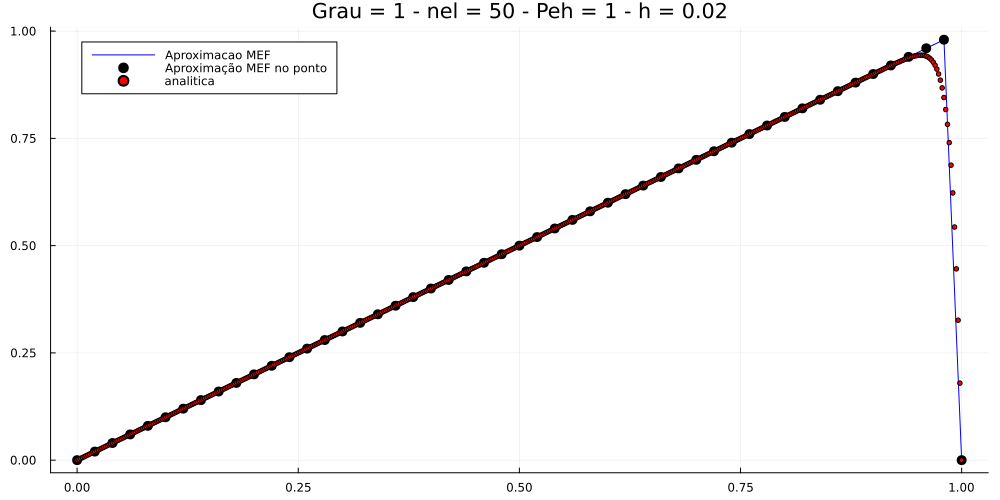

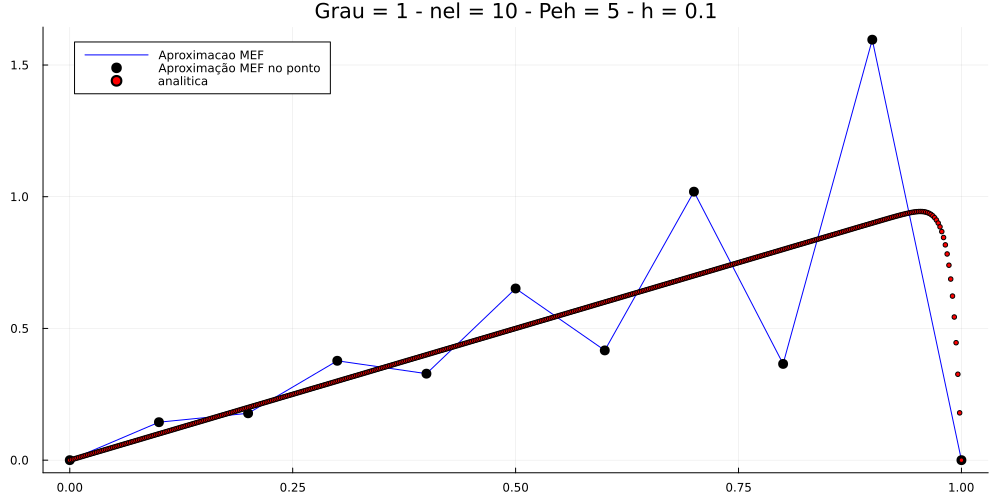

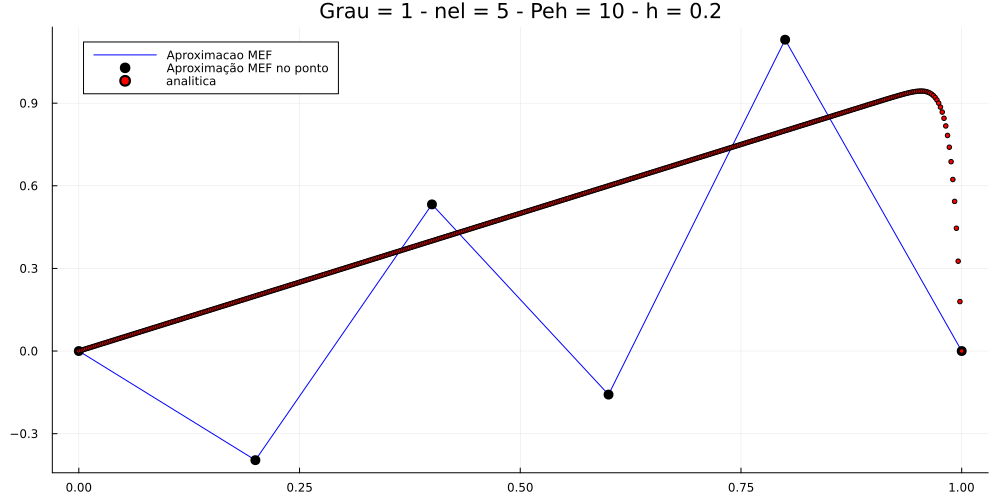

In [10]:
function mef_letra_b(folder_to_save)
    Peh = [1, 5, 10]
    epsilon = 10^(-2)
    kappa = 1
    degree = 1
    
    xi = a
    xf = b
    
    h_Peh = [(P*2*epsilon)/abs(kappa) for P in Peh]
    print(h_Peh)
    print("\n")
    
    n_values = [ceil(Int64,(xf-xi)/(hh)) for hh in h_Peh]
    print((n_values))
    print("\n")
    
    # Dirichtler
    g_a = 0
    g_b = 0

    # Neumann
    q_a = 0
    q_b = 0

    kappa_a = 10^6
    kappa_b = 10^6
    
    print("\n\n")
    for (Peh_index, nel) in enumerate(n_values) #l1
        
        
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        F = zeros(np)

        shg  = shl(1, nen, nint)
        dshg = shl(2, nen, nint)
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        Fe[j] += u(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #l6
                            Me[i, j] += epsilon * dshg[i, l] * dshg[j, l] * ww * 2/h
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                        end #l6
                            
                    end #l5

            end #l4
            
            for i in 0:nint-1 #f7
                F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        F[size(F)[1]] += kappa_b*g_b - q_b
        alphas = M\F
        
        fig = plot(size=(1000, 500))
        plot!(x, alphas, label="Aproximacao MEF", color="blue")  # Continuous line
        plot!(x, alphas, label="Aproximação MEF no ponto", color="black", seriestype=:scatter, ms=5.5)  # Scatter plot for MEF
        plot!(range(a, stop=b, length=500), x -> u_ex(x, kappa, epsilon), seriestype=:scatter, label="analitica", ms=2.5, color="red")  # Scatter plot
        title!("Grau = $degree - nel = $nel - Peh = $(Peh[Peh_index]) - h = $h")
        plot!(grid=true)
        savefig(joinpath(folder_to_save, "grafico_nel_$(nel)_peh_$(Peh[Peh_index])_h_$h.png"))
        display(fig)
    end #l1
    
end # function
subfolder_name = "letra_b"

le_b = joinpath(full_path, subfolder_name)

if !isdir(le_b)
    mkdir(le_b)
end
mef_letra_b(le_b)
;

# Letra C

[0.020000000000000004, 0.10000000000000002, 0.20000000000000004]
[50, 10, 5]




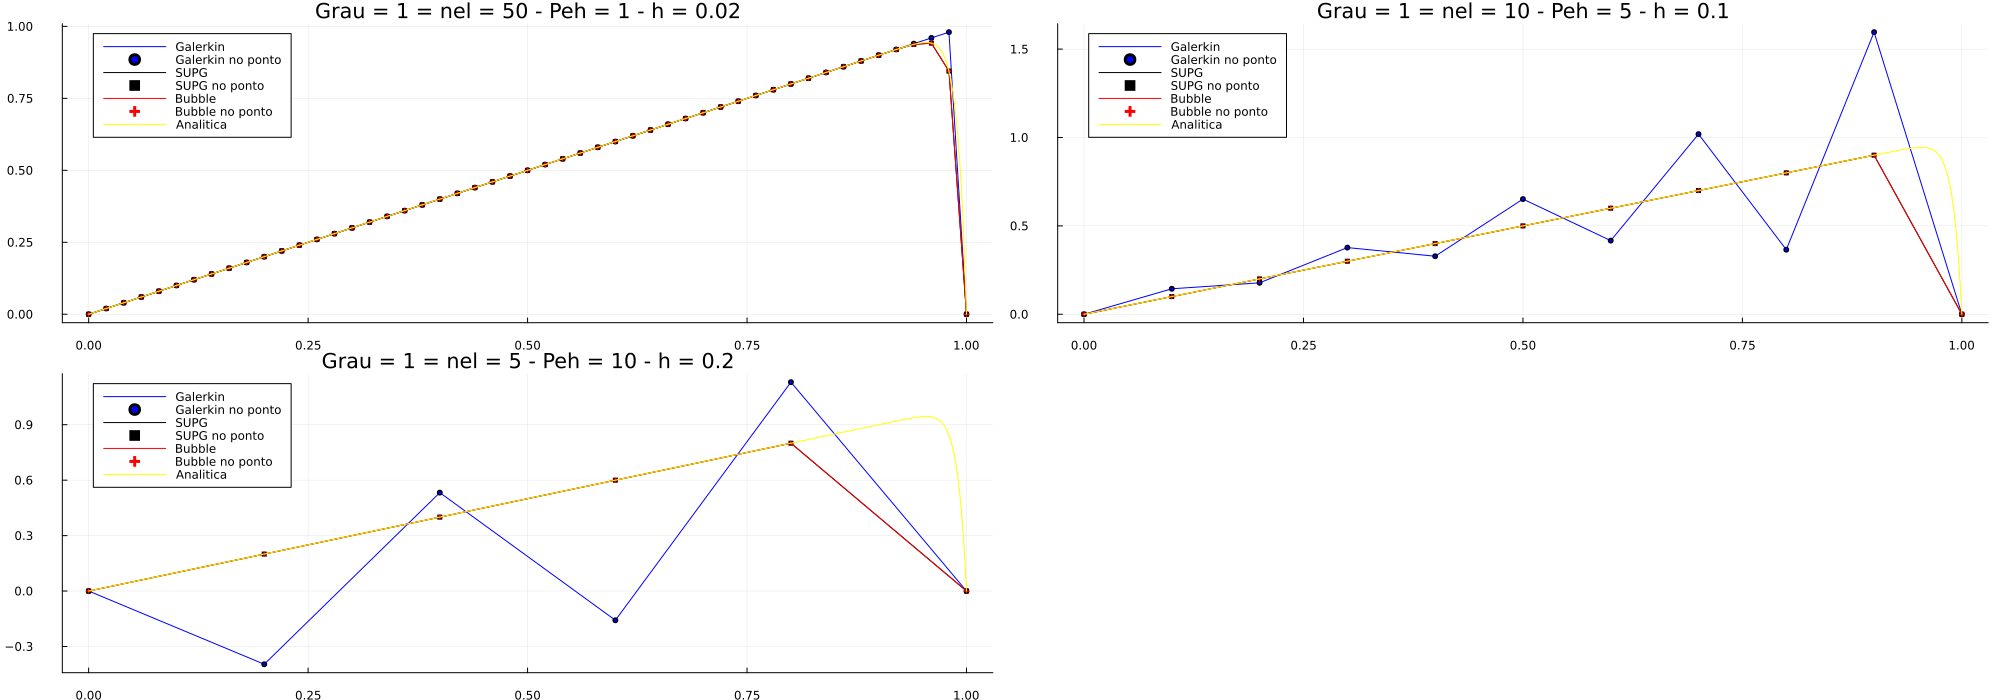

End


In [11]:
function mef_letra_b(folder_to_save)
    Peh = [1, 5, 10]
    epsilon = 10^(-2)
    kappa = 1
    degree = 1
    
    xi = a
    xf = b
    
    h_Peh = [(P*2*epsilon)/abs(kappa) for P in Peh]
    print(h_Peh)
    print("\n")
    
    n_values = [ceil(Int64,(xf-xi)/(hh)) for hh in h_Peh]
    print((n_values))
    print("\n")
    
    # Dirichtler
    g_a = 0
    g_b = 0

    # Neumann
    q_a = 0
    q_b = 0

    kappa_a = 10^6
    kappa_b = 10^6
    
    Galerkin = Vector{Vector{Float64}}([])
    Bubble = Vector{Vector{Float64}}([])
    SUPG = Vector{Vector{Float64}}([])
    xizes = Vector{Vector{Float64}}([])
    
    print("\n\n")
    
    subfolder_name = "galerkin"

    folder_to_save_galerkin = joinpath(folder_to_save, subfolder_name)
    if !isdir(folder_to_save_galerkin)
        mkdir(folder_to_save_galerkin)
    end
    
    # Galerkin
    for (Peh_index, nel) in enumerate(n_values) #l1
        
        
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        F = zeros(np)

        shg  = shl(1, nen, nint)
        dshg = shl(2, nen, nint)
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        Fe[j] += u(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #l6
                            Me[i, j] += epsilon * dshg[i, l] * dshg[j, l] * ww * 2/h
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                        end #l6
                            
                    end #l5

            end #l4
            
            for i in 0:nint-1 #f7
                F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        F[size(F)[1]] += kappa_b*g_b - q_b
        alphas = M\F
        
        # Xizes[Peh_index] = x
        # Galerkin[Peh_index] = alphas
        push!(xizes, x)
        push!(Galerkin, alphas)
        
        fig = plot(size=(1000, 500))
        plot!(x, alphas, label="Aproximacao MEF", color="blue")  # Continuous line
        plot!(x, alphas, label="Aproximação MEF no ponto", color="black", seriestype=:scatter, ms=5.5)  # Scatter plot for MEF
        plot!(range(a, stop=b, length=500), x -> u_ex(x, kappa, epsilon), seriestype=:scatter, label="analitica", ms=2.5, color="red")  # Scatter plot
        title!("Grau = $degree - nel = $nel - Peh = $(Peh[Peh_index]) - h = $h")
        plot!(grid=true)
        savefig(joinpath(folder_to_save_galerkin, "grafico_nel_$(nel)_peh_$(Peh[Peh_index])_h_$(h)_galerkin.png"))
        # display(fig)
    end #l1
    
    subfolder_name = "bubble"

    folder_to_save_bubble = joinpath(folder_to_save, subfolder_name)
    if !isdir(folder_to_save_bubble)
        mkdir(folder_to_save_bubble)
    end
    
    # Bubble
    for (Peh_index, nel) in enumerate(n_values) #l1
        
        
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        F = zeros(np)

        
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        
        beta = (1/tanh(Peh[Peh_index])) - (1/Peh[Peh_index])
        shg  = shl_bubble(1, nen, nint, beta)
        dshg = shl(2, nen, nint)
        
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        Fe[j] += u(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #l6
                            Me[i, j] += epsilon * dshg[i, l] * dshg[j, l] * ww * 2/h
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                        end #l6
                            
                    end #l5

            end #l4
            
            for i in 0:nint-1 #f7
                F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        F[size(F)[1]] += kappa_b*g_b - q_b
        alphas = M\F
        
        # Xizes[Peh_index] = x
        # Bubble[Peh_index] = alphas
        push!(xizes, x)
        push!(Bubble, alphas)
        
        fig = plot(size=(1000, 500))
        plot!(x, alphas, label="Aproximacao MEF", color="blue")  # Continuous line
        plot!(x, alphas, label="Aproximação MEF no ponto", color="black", seriestype=:scatter, ms=5.5)  # Scatter plot for MEF
        plot!(range(a, stop=b, length=500), x -> u_ex(x, kappa, epsilon), seriestype=:scatter, label="analitica", ms=2.5, color="red")  # Scatter plot
        title!("Grau = $degree - nel = $nel - Peh = $(Peh[Peh_index]) - h = $h")
        plot!(grid=true)
        savefig(joinpath(folder_to_save_bubble, "grafico_nel_$(nel)_peh_$(Peh[Peh_index])_h_$(h)_bolha.png"))
        # display(fig)
    end #l1
    
    subfolder_name = "supg"

    folder_to_save_supg = joinpath(folder_to_save, subfolder_name)
    if !isdir(folder_to_save_supg)
        mkdir(folder_to_save_supg)
    end
    
    # SUPG
    for (Peh_index, nel) in enumerate(n_values) #l1
        
        
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        F = zeros(np)

        
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        
        beta = (1/tanh(Peh[Peh_index])) - (1/Peh[Peh_index])
        shg  = shl(1, nen, nint)
        dshg = shl(2, nen, nint)
        
        tau = (beta*h)/(2*kappa)
        
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        Fe[j] += u(xx) * shg[j, l] * ww * h/2
                        Fe[j] += tau * kappa * u(xx) * dshg[j, l] * ww

                        for i in 1:nen #l6
                            Me[i, j] += (epsilon + (tau*(kappa^2))) * dshg[i, l] * dshg[j, l] * ww * 2/h
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                        end #l6
                            
                    end #l5

            end #l4
            
            for i in 0:nint-1 #f7
                F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        F[size(F)[1]] += kappa_b*g_b - q_b
        alphas = M\F
        
        # Xizes[Peh_index] = x
        # SUPG[Peh_index] = alphas
        push!(xizes, x)
        push!(SUPG, alphas)
        
        fig = plot(size=(1000, 500))
        plot!(x, alphas, label="Aproximacao MEF", color="blue")  # Continuous line
        plot!(x, alphas, label="Aproximação MEF no ponto", color="black", seriestype=:scatter, ms=5.5)  # Scatter plot for MEF
        plot!(range(a, stop=b, length=500), x -> u_ex(x, kappa, epsilon), seriestype=:scatter, label="analitica", ms=2.5, color="red")  # Scatter plot
        title!("Grau = $degree - nel = $nel - Peh = $(Peh[Peh_index]) - h = $h")
        plot!(grid=true)
        savefig(joinpath(folder_to_save_supg, "grafico_nel_$(nel)_peh_$(Peh[Peh_index])_h_$(h)_supg.png"))
        # display(fig)
    end #l1
    for plk in reverse(4:size(xizes, 1))
        deleteat!(xizes, plk)
    end
    p = plot(layout=(3), size=(1000, 1000))
    for idx_vec in 1:3
        plot!(p[idx_vec...], xizes[idx_vec], Galerkin[idx_vec], label="Galerkin", color="blue")
        plot!(p[idx_vec...], xizes[idx_vec], Galerkin[idx_vec], label="Galerkin no ponto", color="blue", marker=:circle, seriestype=:scatter, ms=2.5)
        
        plot!(p[idx_vec...], xizes[idx_vec], SUPG[idx_vec], label="SUPG", color="black")
        plot!(p[idx_vec...], xizes[idx_vec], SUPG[idx_vec], label="SUPG no ponto", color="black", marker=:square, seriestype=:scatter, ms=2.5)
        
        plot!(p[idx_vec...], xizes[idx_vec], Bubble[idx_vec], label="Bubble", color="red")
        plot!(p[idx_vec...], xizes[idx_vec], Bubble[idx_vec], label="Bubble no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        
        plot!(p[idx_vec...], range(a, stop=b, length=500), x -> u_ex(x, kappa, epsilon), label="Analitica", color="yellow")
        
        
        plot!(p[idx_vec...], grid=true, legend=:topleft, size=(2000,700))
    end
    title!(p[1...], "Grau = 1 = nel = 50 - Peh = 1 - h = 0.02")
    title!(p[2...], "Grau = 1 = nel = 10 - Peh = 5 - h = 0.1")
    title!(p[3...], "Grau = 1 = nel = 5 - Peh = 10 - h = 0.2")
    display(p)
    savefig(p, joinpath(folder_to_save, "grafico_todos_juntos.png"))
    
end # function

subfolder_name = "letra_c"

le_c = joinpath(full_path, subfolder_name)

if !isdir(le_c)
    mkdir(le_c)
end


mef_letra_b(le_c)

println("End")
;
